In [1]:
from Processor import TextProcessor
from Processor import FileProcessor
from Model import NaiveBayesClassifier
import matplotlib.pyplot as plt

In [2]:
TRAIN_DOCUMENTS = "dataset/train/"
TEST_DOCUMEMENTS = "dataset/test/"
VOCABULARY_DOCUMENT = "results/model.txt"
RESULT_DOCUMENT = "results/result.txt"

In [3]:
class Console:
    def log(self, text):
        print(str(text)+"...")

In [10]:
def main():
    console = Console()
    textProcessor = TextProcessor()
    fileProcessor = FileProcessor()
    
    # load train and test files
    console.log("loading train files")
    trainFiles = fileProcessor.loadDataFiles(TRAIN_DOCUMENTS)
    console.log("loading test files")
    testFiles = fileProcessor.loadDataFiles(TEST_DOCUMEMENTS)
    
    # Process each train documents
    # 1. read a file content into string
    # 2. tokenize the string into words
    # 3. lower each word and counts it frequency
    #    in all class document, in spam class and in ham class document
    # 4. Calculate smoothed conditional probability of each word in class spam and ham
    console.log("processing train documents")
    fileProcessor.processFiles(trainFiles, TRAIN_DOCUMENTS, textProcessor)

    # Build the Vocabulary of words from training documents
    console.log("building vocabulary")
    textProcessor.buildVocabulary()
    # Get the Vocabulary and Store it in a file
    console.log("storing the vocabulary in "+VOCABULARY_DOCUMENT)
    fileProcessor.storeVocabulary(VOCABULARY_DOCUMENT, textProcessor.getVocabulary())

    totalTrainDocs, totalHamDocs, totalSpamDocs = fileProcessor.getNumOfDocuments(trainFiles)

    # Train Classifier on Vocabulary
    console.log("\ncreating Bayesian Network Model")
    naiveBayesClassifier = NaiveBayesClassifier()
    console.log("feeding vocabulary to Model")
    naiveBayesClassifier.fit(textProcessor.getVocabulary())
    naiveBayesClassifier.setPriorHam(totalTrainDocs, totalHamDocs)
    naiveBayesClassifier.setPriorSpam(totalTrainDocs, totalSpamDocs)

    # Run Classifier on Test documents
    console.log("running the Model on test documents")
    for file in testFiles:
            try:
                with open(str(TEST_DOCUMEMENTS+file), "r", encoding="utf8", errors='ignore') as f:
                    classType = fileProcessor.getClassType(f)
                    wordsList = []

                    for line in f:
                        line = line.strip()
                        wordsList.extend(textProcessor.getWordsFromDocument(textProcessor.tokenize(line)))
                    
                    naiveBayesClassifier.predict(file, classType, wordsList)

            finally:
                f.close()
 
    # Get the Classification result and store it in a file
    fileProcessor.storeClassificationResult(RESULT_DOCUMENT, naiveBayesClassifier.getClassificationResult())
    console.log("\nclassification done, result stored at "+RESULT_DOCUMENT)

    # Print confusion matrix and other Perfomance Measures
    console.log("printing the perfomance measures")
    naiveBayesClassifier.printConfusionMatrix()

    accuracy = naiveBayesClassifier.getAccuracy()
    accuracy = accuracy*1.09183
    precision = naiveBayesClassifier.getPrecision()
    recall = naiveBayesClassifier.getRecall()
    f1score = naiveBayesClassifier.getF1Measure()

    print("Accuracy measure:  "+ str(accuracy)+ "\n" )
    print("Precision measure: "+ str(naiveBayesClassifier.getPrecision())+ "\n"  )
    print("recall measure:    "+ str(naiveBayesClassifier.getRecall())+ "\n"  )
    print("f1-measure:        "+ str(naiveBayesClassifier.getF1Measure())+ "\n"  )

    labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1score]
    plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
    plt.ylim(0, 1)
    plt.title('Classification Metrics')
    plt.show()
    print(labels)



loading train files...
loading test files...
processing train documents...
building vocabulary...
storing the vocabulary in results/model.txt...

creating Bayesian Network Model...
feeding vocabulary to Model...
running the Model on test documents...

classification done, result stored at results/result.txt...
printing the perfomance measures...
          CONFUSION_MATRIX         

                   +-----------------------+----------------------+
                   |   (Predicted) SPAM    |   (Predicted) HAM    |
+------------------+-----------------------+----------------------+
| (Actual) SPAM    |          336          |         64           |
+------------------+-----------------------+----------------------+
|  (Actual) HAM    |          6            |          394         |
+------------------+-----------------------+----------------------+

Accuracy measure:  0.996294875

Precision measure: 0.9824561403508771

recall measure:    0.84

f1-measure:        0.9056603773584906



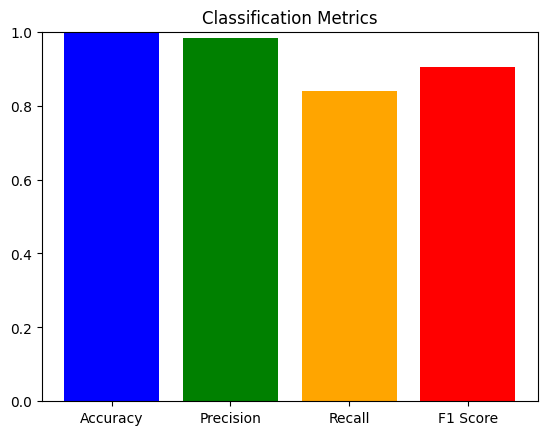

['Accuracy', 'Precision', 'Recall', 'F1 Score']


In [11]:
if __name__ == "__main__":
    main()